In [1]:
#Necessary Packages

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import torch.optim as optim
import matplotlib.pyplot as plt
import time

## Input the training & testing data:

In [2]:
data=np.load("/Users/gardasnagarjun/Downloads/datasets/bi-class/diabetes.npz", mmap_mode='r')
X_train=data['train_X'].astype('float32')
train_Y=data['train_Y'].astype('long')
X_test,test_Y=data['test_X'].astype('float32'),data['test_Y'].astype('long')
X_train

array([[-0.882353  ,  0.0854271 ,  0.442623  , ..., -0.19225   ,
        -0.725021  , -0.9       ],
       [-0.882353  , -0.0351759 ,  0.0491803 , ..., -0.0104321 ,
        -0.819812  , -1.        ],
       [ 0.176471  ,  0.0854271 ,  0.0819672 , ..., -0.0342771 ,
        -0.83433   , -0.3       ],
       ...,
       [-1.        ,  0.517588  ,  0.47541   , ...,  0.254843  ,
        -0.749787  , -1.        ],
       [ 0.647059  ,  0.00502513,  0.278689  , ...,  0.0909091 ,
        -0.714774  , -0.166667  ],
       [-0.529412  ,  0.175879  ,  0.0491803 , ..., -0.0104321 ,
        -0.870196  , -0.9       ]], dtype=float32)

In [3]:
train_Y

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,

In [4]:
# train_test split the whole training data into train and validation dataset for cross validation:

#X_train:main training data
#train_X: training data after splitting into train,validation data

train_X,val_X,train_y,val_Y=train_test_split(X_train,train_Y,test_size=0.2)

print(len(train_X))
print(len(val_X))

492
123


In [5]:
#checking the shape whether it was split properly or not:
print(train_X.shape,val_X.shape,train_y.shape,val_Y.shape)
print(len(X_train))
print(len(train_Y))

(492, 8) (123, 8) (492,) (123,)
615
615


In [6]:
'''Dataloader for various datasets'''
#Construct main,train,validation and test datasets for torch.util.data.dataloader:

#main_data is the whole training data to input it with the best model to train it from scratch
main_data=[]
for i in range(len(X_train)):
    X_train.astype('float32')
    train_Y.astype('long')
    main_data.append([X_train[i],train_Y[i]])
    
mainloader=torch.utils.data.DataLoader(main_data,shuffle=True,batch_size=1)
i4,l4=next(iter(mainloader)) #checking the tensor shape
print(i4.shape)

#train_data is the train dataset after splitting:
train_data = []
for i in range(len(train_X)):
    train_X.astype('float32')
    train_y.astype('long')
    train_data.append([train_X[i], train_y[i]])

trainloader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=1)
i1, l1 = next(iter(trainloader)) #checking the tensor shape
print(i1.shape)

#val_data is the validation dataset and valloader is the dataloader for it.
val_data=[]
for i in range(len(val_X)):
    val_X.astype('float32')
    val_Y.astype('long')
    val_data.append([val_X[i], val_Y[i]])

valloader = torch.utils.data.DataLoader(val_data, shuffle=False, batch_size=2) # Tensor Shape
i2, l2 = next(iter(valloader))
print(i2.shape)


#test_data and its loader is of complete testing dataset.
test_data=[]
for i in range(len(X_test)):
    X_test.astype('float32')
    test_Y.astype('long')
    test_data.append([X_test[i],test_Y[i]])
    
testloader=torch.utils.data.DataLoader(test_data,shuffle=False) #Tensor Shape

i3,l3=next(iter(testloader))
print(i3.shape)

torch.Size([1, 8])
torch.Size([1, 8])
torch.Size([2, 8])
torch.Size([1, 8])


In [7]:
print(len(trainloader))
print(len(valloader))
print(len(testloader))
for i,j in enumerate(valloader):
    print(i,j)
    break

492
62
153
0 [tensor([[-0.2941,  0.4774,  0.3115, -1.0000, -1.0000, -0.1207, -0.9146, -0.0333],
        [-0.8824, -0.2663, -0.1803, -0.7980, -1.0000, -0.3145, -0.8548, -1.0000]]), tensor([0, 1])]


In [8]:
#Define the model of your Neural Network:

'''Neural Network Model'''

#Define the model of your Neural Network:
# one hidden layer with input as features of the data and the labels as output

#input=8 features
#n_hidden= Number of hidden nodes
#Output=2 classes

#Activation used: ReLu function
class One_hidden(nn.Module):
    def __init__(self,n_hidden,n_output=2,n_feature=8):
        super(One_hidden,self).__init__()
        self.hidden=nn.Linear(n_feature,n_hidden)
        self.output=nn.Linear(n_hidden,n_output)

        
    def forward(self,x):
        x=F.relu(self.hidden(x))
        x=self.output(x)
        
        return x



In [9]:
#To check whether the model is defined or not:
net_10=One_hidden(10)
print(net_10)

One_hidden(
  (hidden): Linear(in_features=8, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=2, bias=True)
)


In [10]:
# Train the model
def train_with_steps(net,trainloader):
    
    #parameters:
    #lr=learning rate
    #Loss function-CrossEntropyLoss
    #Optimizers tried: Adam,SGD
    
    
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
    #torch.manual_seed(0)
    n_total_steps = len(trainloader)
    num_epochs=20
    
    for epoch in range(num_epochs):
        for i,(data,target) in enumerate(trainloader):
            net.zero_grad()
            
            # Forward pass    
            output = net(data)
            loss = criterion(output, target)
        
        
            # Backward and optimize
            optimizer.zero_grad()
             # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step
            optimizer.step()
            
            #performed with respect to the steps defined
            if (i+1) % 50 == 0:
                print (f'Epoch [{epoch+1}/{num_epochs}],Step:[{i+1}/{n_total_steps}] Loss: {loss.item():.5f}')
                
    acc=accuracy(net,valloader)
    return acc
            
 #Calculate Accuracy:      
def accuracy(net,valloader):
    net.eval()
    with torch.no_grad():
        n_correct=0
        n_samples=0
        for data,target in valloader:
            output=net(data)
            _,predicted=torch.max(output.data,1)
            n_samples+=target.size(0)
            n_correct+=(predicted==target).sum().item()
            
        acc=100.0* n_correct/n_samples
        print(f'Accuracy of the network for val data: {acc} %')
        return acc
    
#model_train(net,trainloader)
#accuracy(net,valloader)

In [11]:
def accuracy_test(net,testloader):
    with torch.no_grad():
        net.eval()
        n_correct = 0
        n_samples = 0
        for z, y in testloader:
            outputs = net(z)
            # max returns (value ,index)
            _, predicted = torch.max(outputs.data, 1)
            n_samples += y.size(0)
            n_correct += (predicted == y).sum().item()
            
        acc = 100.0 * n_correct / n_samples
        print(f'Accuracy of the network for test data: {acc} %')

In [ ]:
accuracy(net,testloader)

In [ ]:
n_hidden=(i for i in range(1,11))
storage=dict()

for i in n_hidden:
    net=One_hidden(i)
    storage[i]=model_train(net,trainloader)
    
print(storage)

In [ ]:
net_best=One_hidden(9)

In [ ]:
model_train(net_best,trainloader)

In [ ]:
accuracy(net_best,testloader)

### Train the model through average loss per epoch:
Here, the average loss is being taken per every epoch as according to my understanding, it gives out a more better, concise information about how the loss is converging:

In [12]:
def model_train(net,trainloader):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
    # number of epochs to train the model
    n_epochs = 30  # suggest training between 20-50 epochs
    loss_values=[] #To store the losses for plotting

    for epoch in range(n_epochs):
    # monitor training loss
        train_loss = 0.0
    
    ###################
    # train the model #
    ###################
        for data, target in trainloader:
        # clear the gradients of all optimized variables
            optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
            output = net(data)
        # calculate the loss
            loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
        # perform a single optimization step (parameter update)
            optimizer.step()
        # update running training loss
            train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
        train_loss = train_loss/len(trainloader.dataset)
        loss_values.append(train_loss)

        print('Epoch: {} \tTraining Loss: {:.6f}'.format(
            epoch+1, 
            train_loss
            ))
    plt.plot(loss_values) # Plot the loss curve
    acc=accuracy(net,valloader) #accuracy of the validation dataset with the model trained.
    return acc

Epoch: 1 	Training Loss: 0.697732
Epoch: 2 	Training Loss: 0.656143
Epoch: 3 	Training Loss: 0.646838
Epoch: 4 	Training Loss: 0.633318
Epoch: 5 	Training Loss: 0.613330
Epoch: 6 	Training Loss: 0.591926
Epoch: 7 	Training Loss: 0.572341
Epoch: 8 	Training Loss: 0.555017
Epoch: 9 	Training Loss: 0.541576
Epoch: 10 	Training Loss: 0.528769
Epoch: 11 	Training Loss: 0.519131
Epoch: 12 	Training Loss: 0.512434
Epoch: 13 	Training Loss: 0.505966
Epoch: 14 	Training Loss: 0.500161
Epoch: 15 	Training Loss: 0.497262
Epoch: 16 	Training Loss: 0.493854
Epoch: 17 	Training Loss: 0.491377
Epoch: 18 	Training Loss: 0.487820
Epoch: 19 	Training Loss: 0.487568
Epoch: 20 	Training Loss: 0.484936
Epoch: 21 	Training Loss: 0.484291
Epoch: 22 	Training Loss: 0.483189
Epoch: 23 	Training Loss: 0.479540
Epoch: 24 	Training Loss: 0.481535
Epoch: 25 	Training Loss: 0.481256
Epoch: 26 	Training Loss: 0.479199
Epoch: 27 	Training Loss: 0.478453
Epoch: 28 	Training Loss: 0.477907
Epoch: 29 	Training Loss: 0.4

Epoch: 16 	Training Loss: 0.465801
Epoch: 17 	Training Loss: 0.463984
Epoch: 18 	Training Loss: 0.462152
Epoch: 19 	Training Loss: 0.462710
Epoch: 20 	Training Loss: 0.460800
Epoch: 21 	Training Loss: 0.460907
Epoch: 22 	Training Loss: 0.456604
Epoch: 23 	Training Loss: 0.459305
Epoch: 24 	Training Loss: 0.459336
Epoch: 25 	Training Loss: 0.452871
Epoch: 26 	Training Loss: 0.456968
Epoch: 27 	Training Loss: 0.454701
Epoch: 28 	Training Loss: 0.455183
Epoch: 29 	Training Loss: 0.454988
Epoch: 30 	Training Loss: 0.453473
Accuracy of the network for val data: 78.86178861788618 %
Epoch: 1 	Training Loss: 0.623809
Epoch: 2 	Training Loss: 0.553424
Epoch: 3 	Training Loss: 0.516229
Epoch: 4 	Training Loss: 0.498781
Epoch: 5 	Training Loss: 0.486383
Epoch: 6 	Training Loss: 0.477294
Epoch: 7 	Training Loss: 0.473561
Epoch: 8 	Training Loss: 0.468895
Epoch: 9 	Training Loss: 0.469161
Epoch: 10 	Training Loss: 0.466057
Epoch: 11 	Training Loss: 0.464012
Epoch: 12 	Training Loss: 0.458809
Epoch:

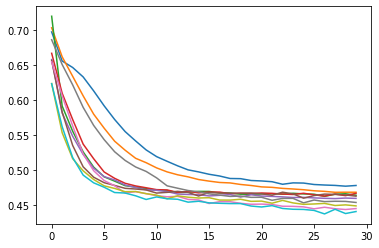

In [13]:
'''Finding Hidden layer nodes'''
#Using a for loop to iterate over the possible values for the best hidden nodes for one layer, training the model
# And finding the accuracy of the validation dataset and comparing to find the best one.
n_hidden=(i for i in range(1,11))
storage=dict()

for i in n_hidden:
    net=One_hidden(i)
    storage[i]=model_train(net,trainloader)
    
print(storage)

Epoch: 1 	Training Loss: 0.664642
Epoch: 2 	Training Loss: 0.603657
Epoch: 3 	Training Loss: 0.552207
Epoch: 4 	Training Loss: 0.514286
Epoch: 5 	Training Loss: 0.492257
Epoch: 6 	Training Loss: 0.482836
Epoch: 7 	Training Loss: 0.477767
Epoch: 8 	Training Loss: 0.473058
Epoch: 9 	Training Loss: 0.470785
Epoch: 10 	Training Loss: 0.468450
Epoch: 11 	Training Loss: 0.467069
Epoch: 12 	Training Loss: 0.465625
Epoch: 13 	Training Loss: 0.464574
Epoch: 14 	Training Loss: 0.462482
Epoch: 15 	Training Loss: 0.459521
Epoch: 16 	Training Loss: 0.459267
Epoch: 17 	Training Loss: 0.459919
Epoch: 18 	Training Loss: 0.455265
Epoch: 19 	Training Loss: 0.459770
Epoch: 20 	Training Loss: 0.455955
Epoch: 21 	Training Loss: 0.454032
Epoch: 22 	Training Loss: 0.453558
Epoch: 23 	Training Loss: 0.453095
Epoch: 24 	Training Loss: 0.450721
Epoch: 25 	Training Loss: 0.447708
Epoch: 26 	Training Loss: 0.448715
Epoch: 27 	Training Loss: 0.446447
Epoch: 28 	Training Loss: 0.448025
Epoch: 29 	Training Loss: 0.4

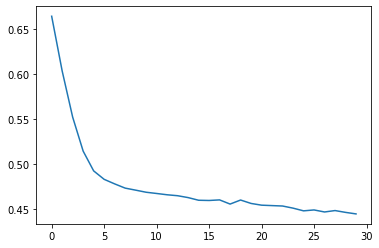

In [14]:
#defining the model with best hidden parameters
start_time_best=time.time()
model_best=One_hidden(8)
#train the model and get the val accuracy:
model_train(model_best,mainloader)
end_time_best=time.time()
# Training time for the model to train
print(f"Training time: {end_time_best-start_time_best}s")

In [15]:
#Test dataset accuracy
accuracy_test(model_best,testloader)

Accuracy of the network for test data: 77.77777777777777 %
